In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [174]:
#базовые данные (потребление, выработка)
#необходимо при импорте файла сразу заменять в десятичных числах запятную на точку
data = pd.read_csv(r"/Users/user/Desktop/energy.csv",decimal=",",sep=';')
data.head()

,t,C,X,G
0,1,12.1,0,33.814
1,2,12.1,0,29.378
2,3,12.1,0,30.920
3,4,12.1,0,29.299
4,5,12.1,0,29.137


In [175]:
#Определение дефицита активной мощности (E), кВт*ч
def deficit(df):
    #Расчет разности потребления и выработки активной мощности, кВт*ч
    df2["D"] = (df2["X"]+df2["C"])*1.15-df2["G"]
    df2['i'] = df2.index.tolist()
    for l in range(len(df)):
        e=df.loc[l,'D']
        e_round=int(math.ceil(e))
        #e_round - значение D
        if  e_round <= 0 :
            df.at[int(l),'E']=0
        else:
            df.at[int(l),'E']=df.loc[int(l),'D']
    return df

In [176]:
#Расход топлива (f), кг
def rashod(df) :
    m=0.25
    s=df['E'].sum()
    f=m*s
    print("Расход топлива:", f)
#Затраты на топливо (с), руб.
    c=f*50
    print("Затраты на топливо (с)", c)
#Выбросы (ecol), кг
    ecol=f/10
    print("Выбросы (ecol):", ecol)

In [177]:
#Определение профицита активной мощности (F), кВт*ч
def poficit(df):
    for l in range(len(df)):
        f=df.loc[l,['D']]
        f_round=int(math.ceil(f))
        if  f_round < 0 :
            df.at[int(l),'F']=-df.at[int(l),'D']
        else:
            df.at[int(l),'F']=0
    return df

In [178]:
#Бросовая энергия (dump),кВт*ч
def brosenergy(df):
    for l in range(len(df)):
        e1=df.loc[l,'E'] #дефицит мощности
        e1_round=int(math.ceil(e1))
        x1=df.loc[l,'X'] #работающая прачечная
        x1_round=int(math.ceil(x1))
        if  e1_round > 0 and x1_round > 0 :
            df.at[int(l),'k']=1
        else:
            df.at[int(l),'k']=0
    return df

In [179]:
#Ранжирование интервалов нагрузки по приоритетам (p) и возвращение проранжированного массива
def range_df(df):
    df['p'] = df[df['k']!= 0]['E'].rank(method='dense',ascending=False)
    df['p'].replace(np.nan,s, regex=True, inplace=True)
    return df

In [180]:
#Поиск приоритетного интервала загрузки и перераспределение
def pereraspred(df,m):
#дефицит по прачечной
    xt=df.loc[m,'X']
#датасет с последующими интервалами
    dt=df.loc[int(m+1):len(df)]
#перераспределение дефицита по прачечной
    for l in range(len(dt)):
        if  (int(dt.loc[int(m+1+l),'F']) >= int(xt)):
            df.at[int(m+1+l),'S']+=int(xt)
            df.at[int(m+1+l),'X']+=int(xt)
            df.at[int(m),'X']-=int(xt)
            deficit(df)
            poficit(df)
            break
    return df

In [181]:
#преобразование данных в DataFrame
df = pd.DataFrame(data)
df2 = df.copy(deep=True)
deficit(df2)
poficit(df2)
brosenergy(df2)
s=int(df2['k'].astype(bool).sum(axis=0)+1)
range_df(df2)
df2['S']=0
df3=df2.copy(deep=True)
print(df2)
for pm in range (s-1):
    m=int(df2.loc[df2['p']==pm+1,'i'])
    f=pereraspred(df2,m)
print(f)

     t     C   X       G       D   i       E       F    k    p  S
0    1  12.1   0  33.814 -19.899   0   0.000  19.899  0.0  7.0  0
1    2  12.1   0  29.378 -15.463   1   0.000  15.463  0.0  7.0  0
2    3  12.1   0  30.920 -17.005   2   0.000  17.005  0.0  7.0  0
3    4  12.1   0  29.299 -15.384   3   0.000  15.384  0.0  7.0  0
4    5  12.1   0  29.137 -15.222   4   0.000  15.222  0.0  7.0  0
5    6  12.1   0  29.370 -15.455   5   0.000  15.455  0.0  7.0  0
6    7  12.1   0  28.889 -14.974   6   0.000  14.974  0.0  7.0  0
7    8  27.1   0  31.122   0.043   7   0.043   0.000  0.0  7.0  0
8    9  45.1   0  40.728  11.137   8  11.137   0.000  0.0  7.0  0
9   10  45.1   0  50.211   1.654   9   1.654   0.000  0.0  7.0  0
10  11  63.1   2  68.677   6.188  10   6.188   0.000  1.0  5.0  0
11  12  63.1  10  73.582  10.483  11  10.483   0.000  1.0  3.0  0
12  13  54.1  10  72.894   0.821  12   0.821   0.000  1.0  6.0  0
13  14  54.1   0  72.647 -10.432  13   0.000  10.432  0.0  7.0  0
14  15  51

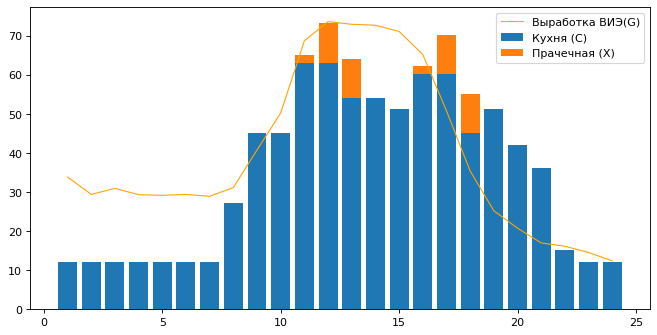

Суммарный дефицит до распределения: 183.03299999999993
Расход топлива: 45.75824999999998
Затраты на топливо (с) 2287.912499999999
Выбросы (ecol): 4.575824999999998
     t     C   X       G       D   i       E       F    k    p  S
0    1  12.1   0  33.814 -19.899   0   0.000  19.899  0.0  7.0  0
1    2  12.1   0  29.378 -15.463   1   0.000  15.463  0.0  7.0  0
2    3  12.1   0  30.920 -17.005   2   0.000  17.005  0.0  7.0  0
3    4  12.1   0  29.299 -15.384   3   0.000  15.384  0.0  7.0  0
4    5  12.1   0  29.137 -15.222   4   0.000  15.222  0.0  7.0  0
5    6  12.1   0  29.370 -15.455   5   0.000  15.455  0.0  7.0  0
6    7  12.1   0  28.889 -14.974   6   0.000  14.974  0.0  7.0  0
7    8  27.1   0  31.122   0.043   7   0.043   0.000  0.0  7.0  0
8    9  45.1   0  40.728  11.137   8  11.137   0.000  0.0  7.0  0
9   10  45.1   0  50.211   1.654   9   1.654   0.000  0.0  7.0  0
10  11  63.1   2  68.677   6.188  10   6.188   0.000  1.0  5.0  0
11  12  63.1  10  73.582  10.483  11  10.483

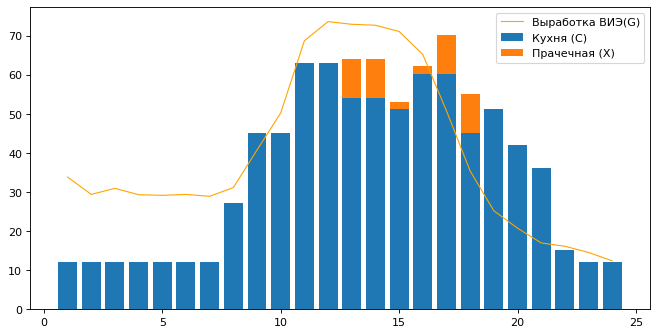

     t     C   X       G       D   i       E       F    k    p   S
0    1  12.1   0  33.814 -19.899   0   0.000  19.899  0.0  7.0   0
1    2  12.1   0  29.378 -15.463   1   0.000  15.463  0.0  7.0   0
2    3  12.1   0  30.920 -17.005   2   0.000  17.005  0.0  7.0   0
3    4  12.1   0  29.299 -15.384   3   0.000  15.384  0.0  7.0   0
4    5  12.1   0  29.137 -15.222   4   0.000  15.222  0.0  7.0   0
5    6  12.1   0  29.370 -15.455   5   0.000  15.455  0.0  7.0   0
6    7  12.1   0  28.889 -14.974   6   0.000  14.974  0.0  7.0   0
7    8  27.1   0  31.122   0.043   7   0.043   0.000  0.0  7.0   0
8    9  45.1   0  40.728  11.137   8  11.137   0.000  0.0  7.0   0
9   10  45.1   0  50.211   1.654   9   1.654   0.000  0.0  7.0   0
10  11  63.1   0  68.677   3.888  10   3.888   0.000  1.0  5.0   0
11  12  63.1   0  73.582  -1.017  11   0.000   1.017  1.0  3.0   0
12  13  54.1  10  72.894   0.821  12   0.821   0.000  1.0  6.0   0
13  14  54.1  10  72.647   1.068  13   1.068   0.000  0.0  7.0

In [182]:
#Представление данных на графиках
graph(df)
sum_e=df3['E'].sum()
print("Суммарный дефицит до распределения:", sum_e)
rashod(df3)
print(df3)
sum_en=fn['E'].sum()
print("Суммарный дефицит после распределения:", sum_en)
rashod(f)
graph(f)
print(f)

In [154]:
def graph(df):
    #подготовка данных
    x = df['t'].values.tolist()
    y1 = df['C'].values.tolist()
    y2 = df['X'].values.tolist()
    y3 = df['G'].values.tolist()
    #рисование графика
    mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']
    fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi= 80)
    ax.plot(x, y3, color = 'orange', linewidth = 1, label = 'Выработка ВИЭ(G)')
    ax.bar(x, y1,label = 'Кухня (С)')
    ax.bar(x, y2, bottom = y1, label = 'Прачечная (Х)')
    ax.legend()
    plt.show()